# BoomBikes Rental Assignment


## Problem Statement

### BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19.

Goal is to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

### Analysis approach 
1. Data Analysis - a quick look at the data, columns, dtypes, checks to see if any cleanup required
2. Data Cleanup - Perform actual cleanup if any required 
3. Pick columns - Drop out columns manualy based on relevance 
4. Visualize data (Continuous vars) - plot correlation chart, heat map to see the data correlation  
5. Visualize data (categorical vars) - Box plot or bar chart 
6. Dataframe preparation for regression analysis 
7. Apply RFE & Manual approach for variable selection 
8. Model Building - Multiple modelds with selected variables 
9. Model Analysis - residual analysis, homescedacity, r-squared 
10. Summary and recommendations  

# Understanding and analysing the data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,mean_squared_error

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("day.csv")

In [3]:
# Lets take a look at data
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Lets check how data describe
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
# Lets Check the information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
# Lets check the shape of dataset 
df.shape

(730, 16)

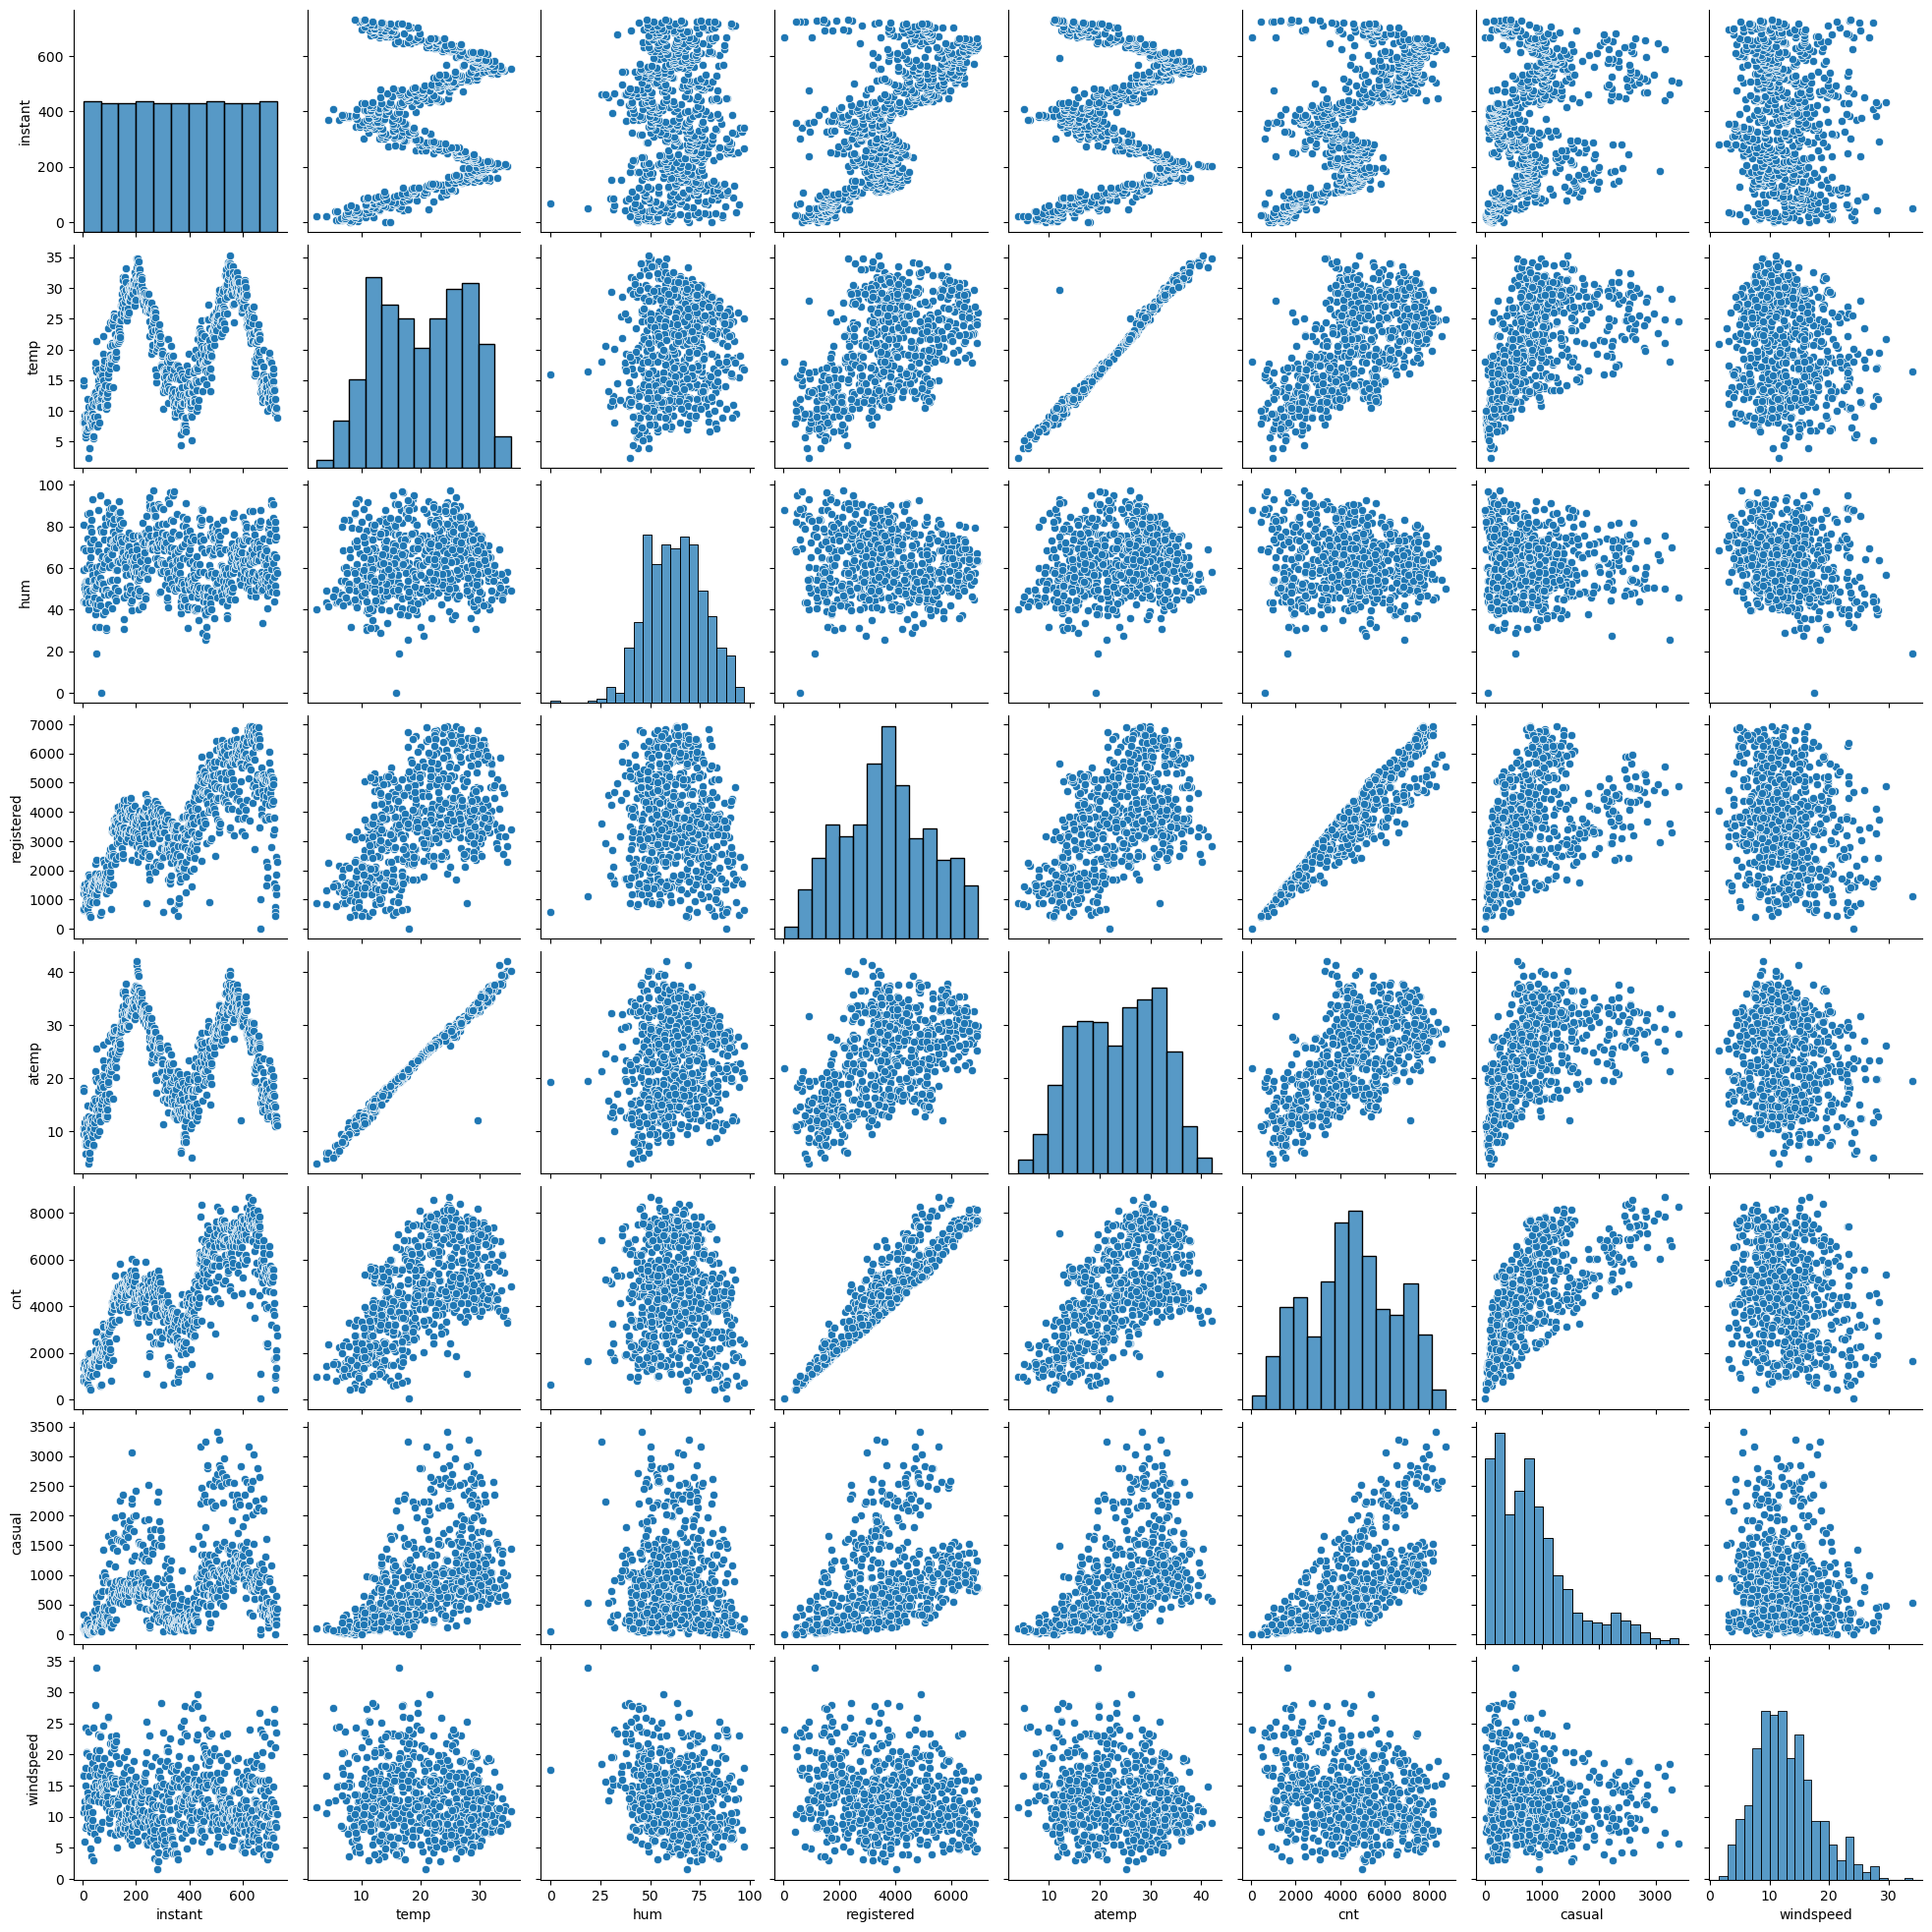

In [8]:
# Lets visualize the numeric columns of the dataset using pairplot
sns.pairplot(df, vars=["instant","temp", "hum","registered","atemp","cnt","casual","windspeed"])
plt.show()

In [9]:
# based on looking of the data dictionary set we can drop some redundant or irrelevant columns.
df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True) 

In [10]:
df.shape

(730, 12)

In [11]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [12]:
df['mnth']=df['mnth'].astype('category')
df['weekday']=df['weekday'].astype('category')
df['weathersit']=df['weathersit'].astype('category')
df['season']=df['season'].astype('category')


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [14]:
df_new=pd.get_dummies(data=df ,drop_first=True)

In [15]:
df_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,0,0,0


In [16]:
df_new.shape

(730, 30)

In [17]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

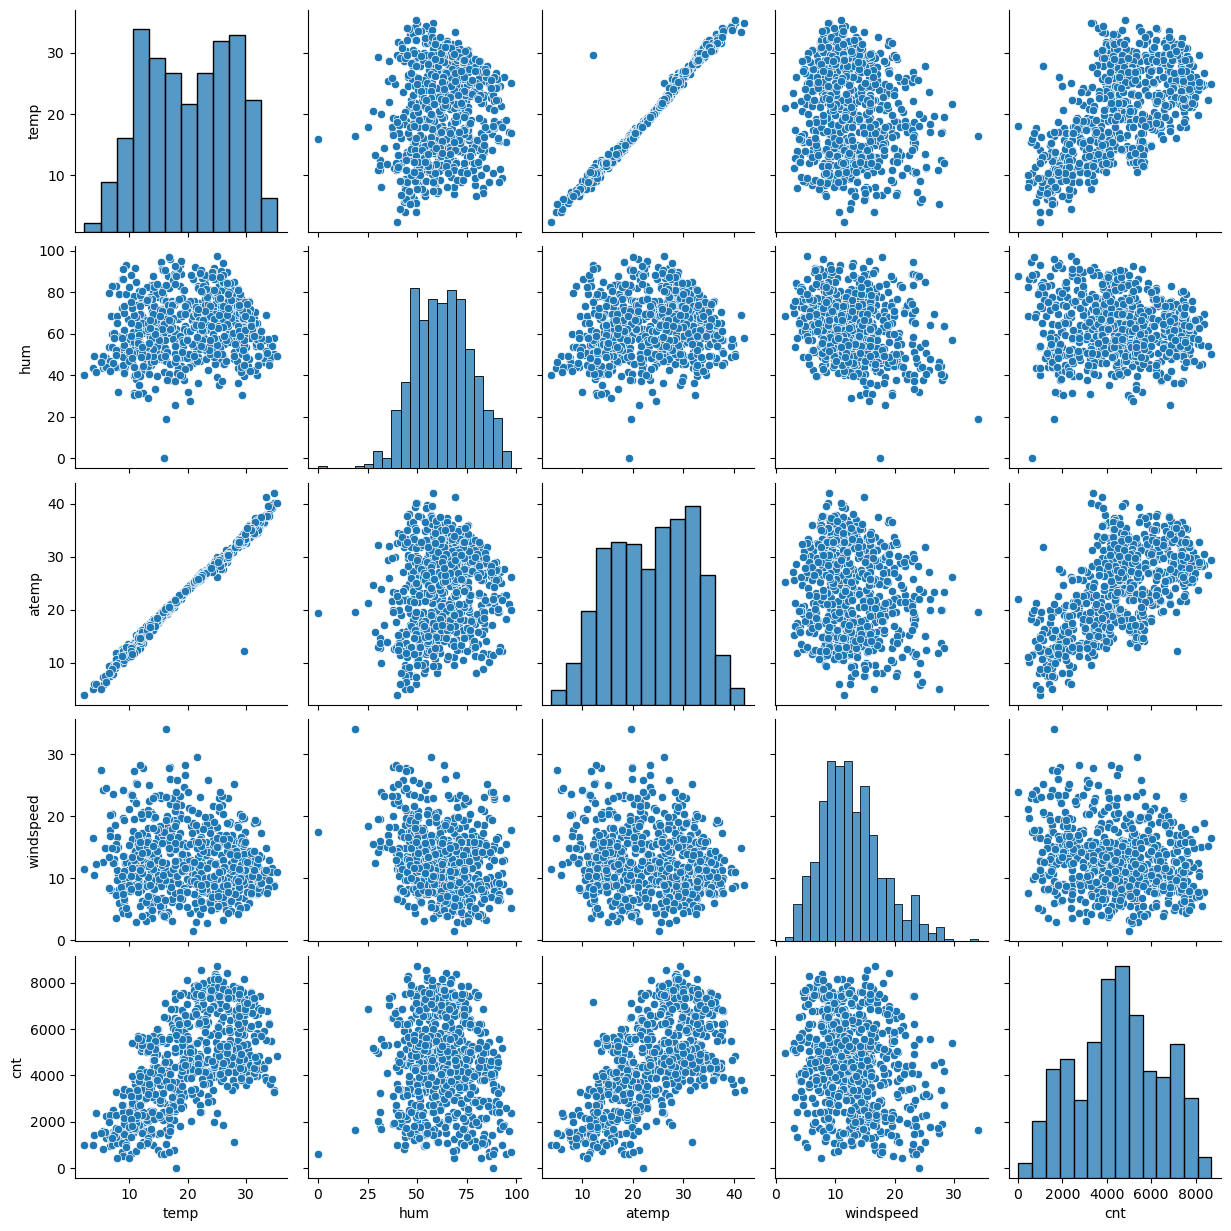

In [18]:
# relation of numerical data between them
sns.pairplot(df_new,vars=['temp','hum','atemp','windspeed',"cnt"])
plt.show()

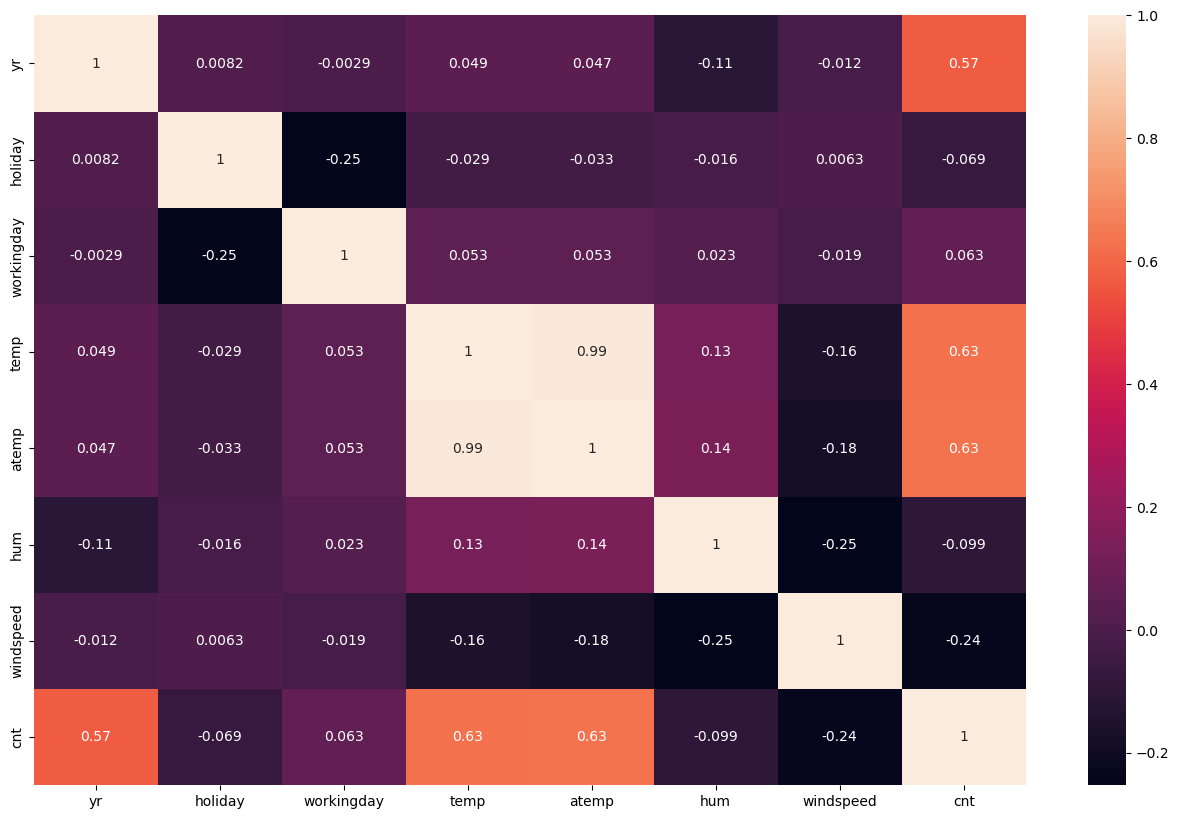

In [19]:
## corelation and multi variate analysis
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

## insights generate from pairplot and heatmap 

- There is 0.99 linear relationship between atemp-temp,temp-atemp.
- There is also 0.63 positive relationship between temp-cnt, atemp-cnt.
- Year and cnt variable has also 0.53 positive relation between them .
- There is a high correlation between temp, atemp so we can skip as independent variable and considered multicolinearity 
- There is a negative relation ship bwteeen cnt and hum ,windspeed but there is a good relation of cnt with other variable so we considered cnt as a target variables

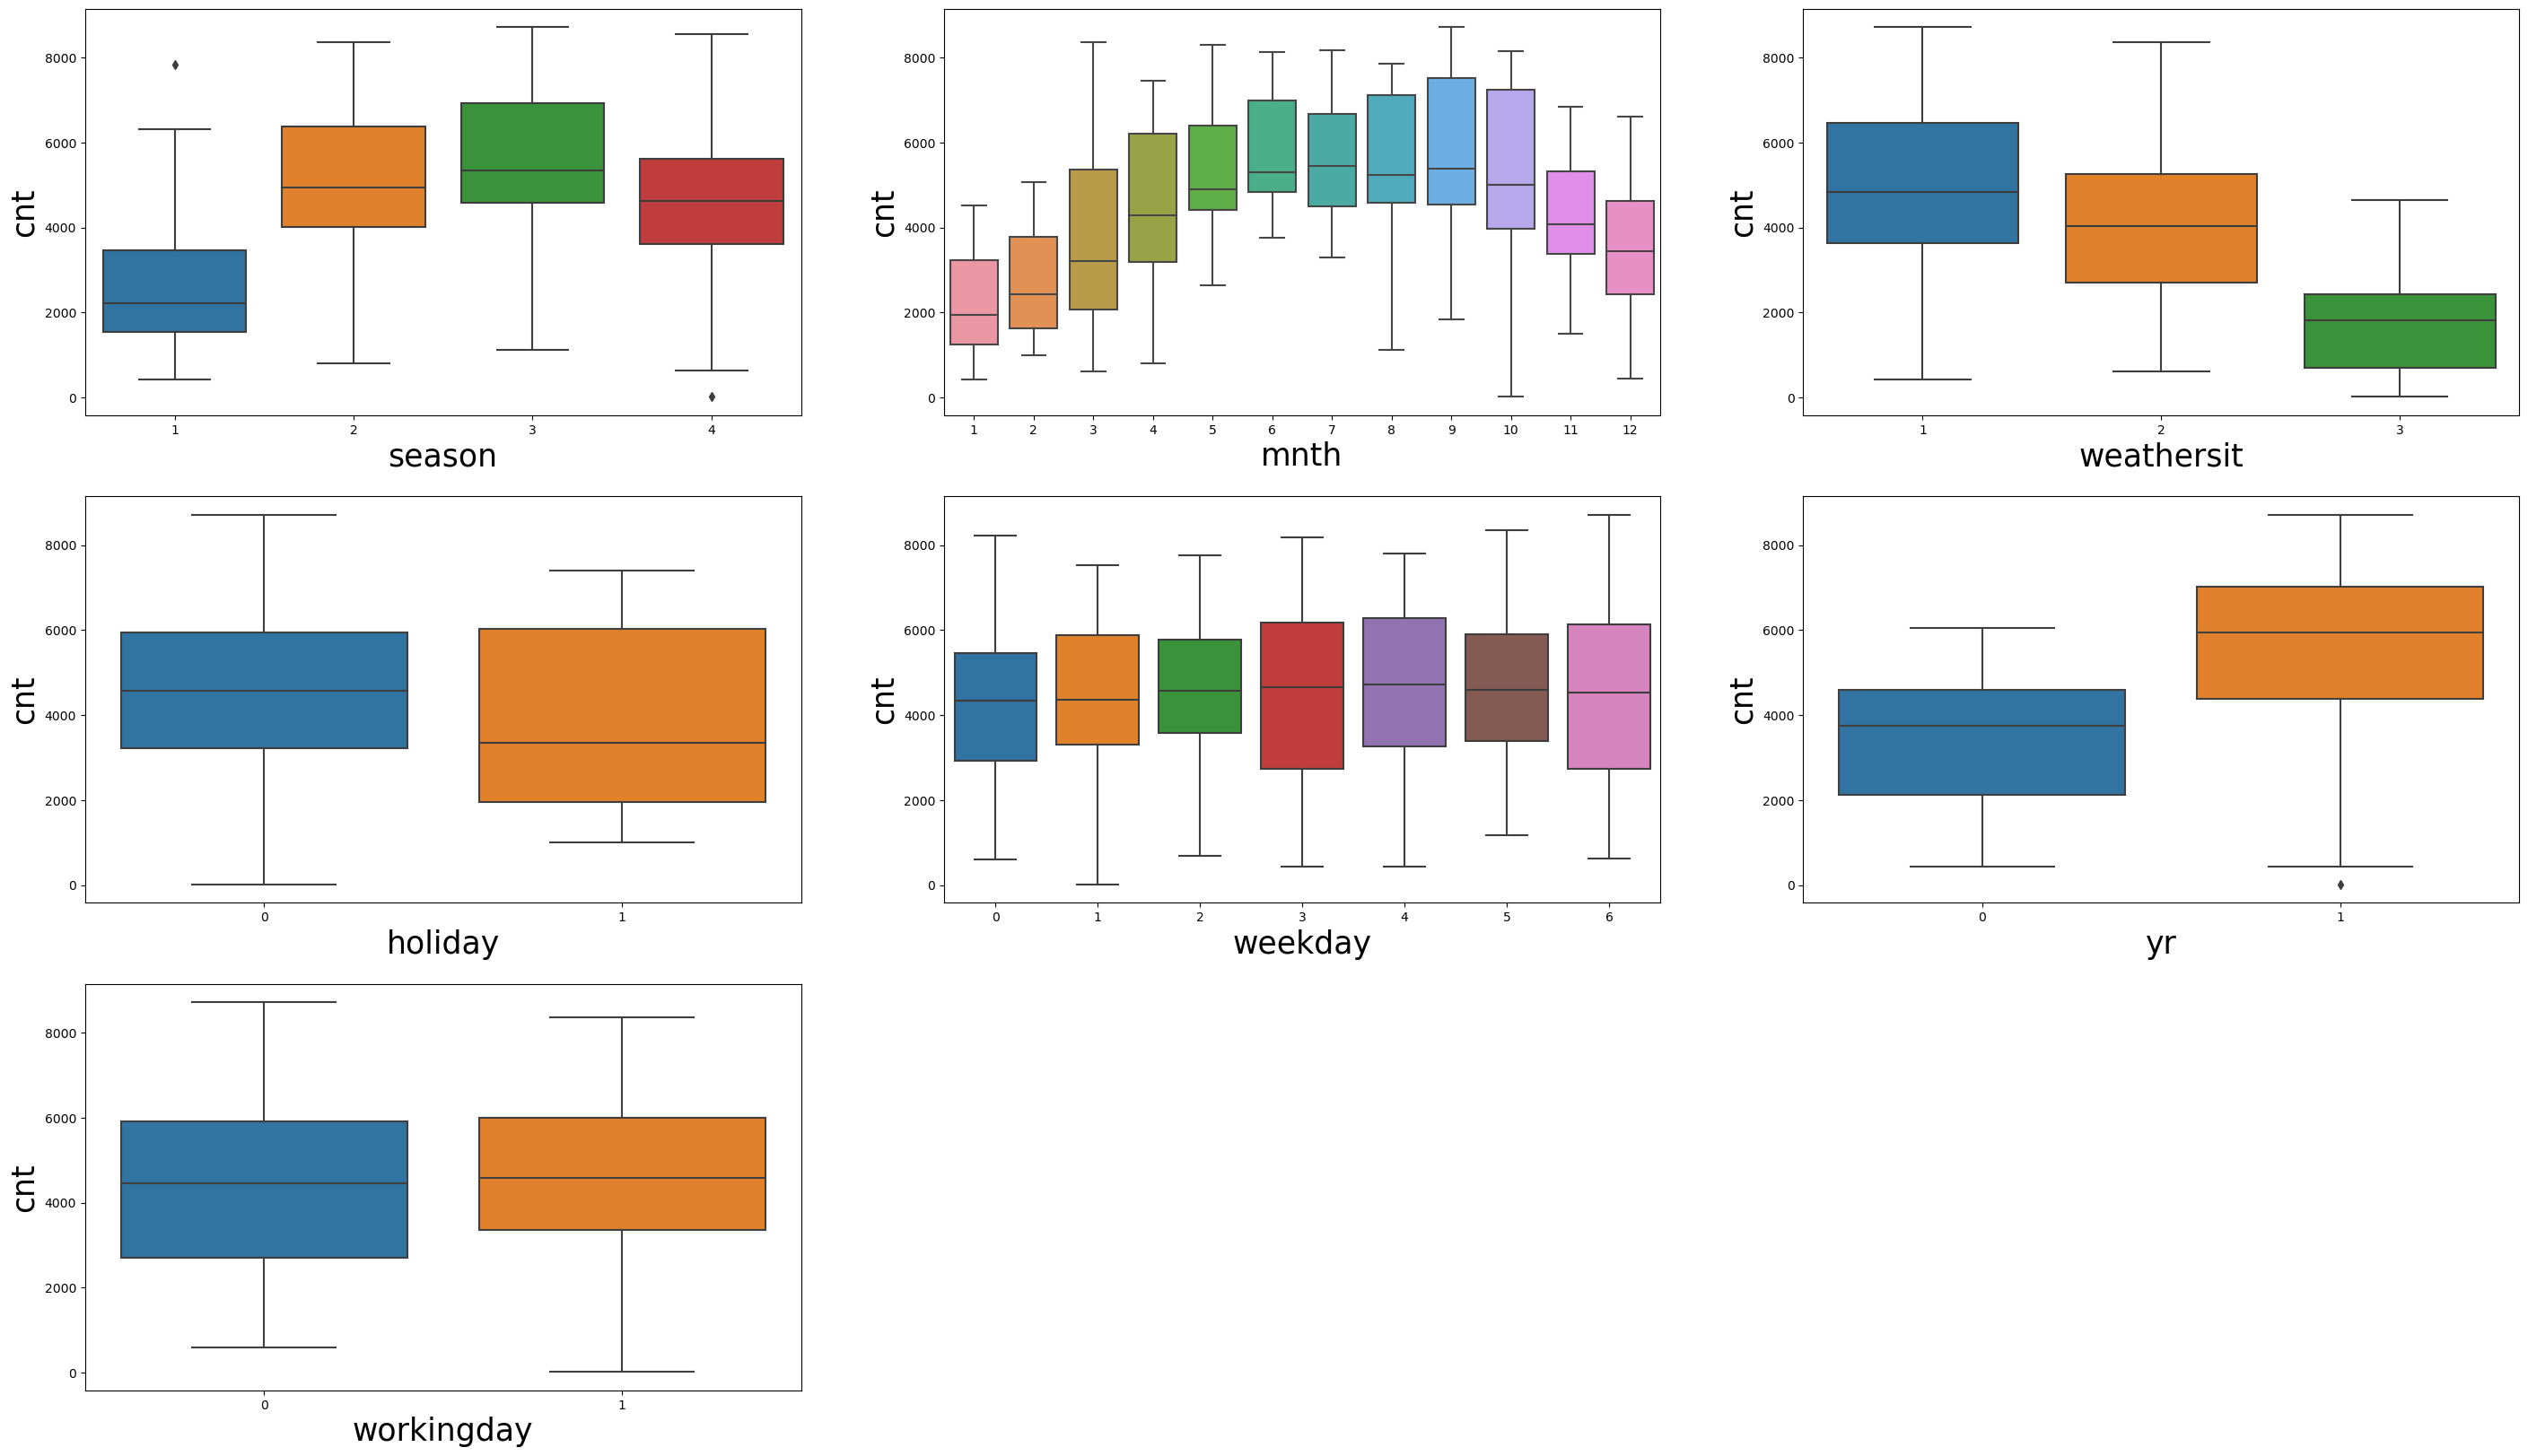

In [20]:
## analysis of categorical relationship between variable

plt.figure(figsize=(35,20))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.xlabel('season', fontsize=25)
plt.ylabel('cnt', fontsize=25)
plt.subplot(3,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.xlabel('mnth', fontsize=25)
plt.ylabel('cnt', fontsize=25)
plt.subplot(3,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.xlabel('weathersit', fontsize=25)
plt.ylabel('cnt', fontsize=25)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.xlabel('holiday', fontsize=25)
plt.ylabel('cnt', fontsize=25)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.xlabel('weekday', fontsize=25)
plt.ylabel('cnt', fontsize=25)
plt.subplot(3,3,6)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.xlabel('yr', fontsize=25)
plt.ylabel('cnt', fontsize=25)
plt.subplot(3,3,7)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.xlabel('workingday', fontsize=25)
plt.ylabel('cnt', fontsize=25)
plt.show()


## insights
- season - most of the booking was happen in season 2,3  over 5000 booking,so it can be independent variable.
- mnth-  there is a more booking over 4000 in 5,6,7,8,9,10 month , so it can be also independent variables.
- weathersit-  most of the booking also happen in weathersit which is in 1 category of situation and over 4000 booking happen in 2nd category of weather situation, so it can also be dependent variables.
- holiday-  most of the bike booking happen when it is not holiday 
- weekday-  this variable has show close trend (similar) in all days so  this variable hasnt affect on bike booking 
- yr- in 2019  bike booking is more compare to 2018 so clearly its shows increment of booking in 2019.
- workingday - this variable has almost high percentage of data of booking in 2 yeras period in working days so it can be good predictor 

## Preparing data for model (train - test data )

In [21]:
df_train, df_test=train_test_split(df_new,train_size=0.70, test_size=0.30, random_state=100)

In [22]:
df_train.shape

(510, 30)

In [23]:
df_test.shape

(219, 30)

In [24]:
scaler = MinMaxScaler()

In [25]:
### we apply this fuction on numerical column , but not binary column beacause of when we apply this feature we use interprtibility of those variales 

num_v=['temp','atemp','hum','windspeed','cnt']
df_train[num_v]=scaler.fit_transform(df_train[num_v])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,1,0,0,0,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,0,0,0,1,1,0


In [26]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.245098,0.262745,...,0.086275,0.084314,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.343137,0.029412
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.430568,0.440557,...,0.281045,0.278131,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


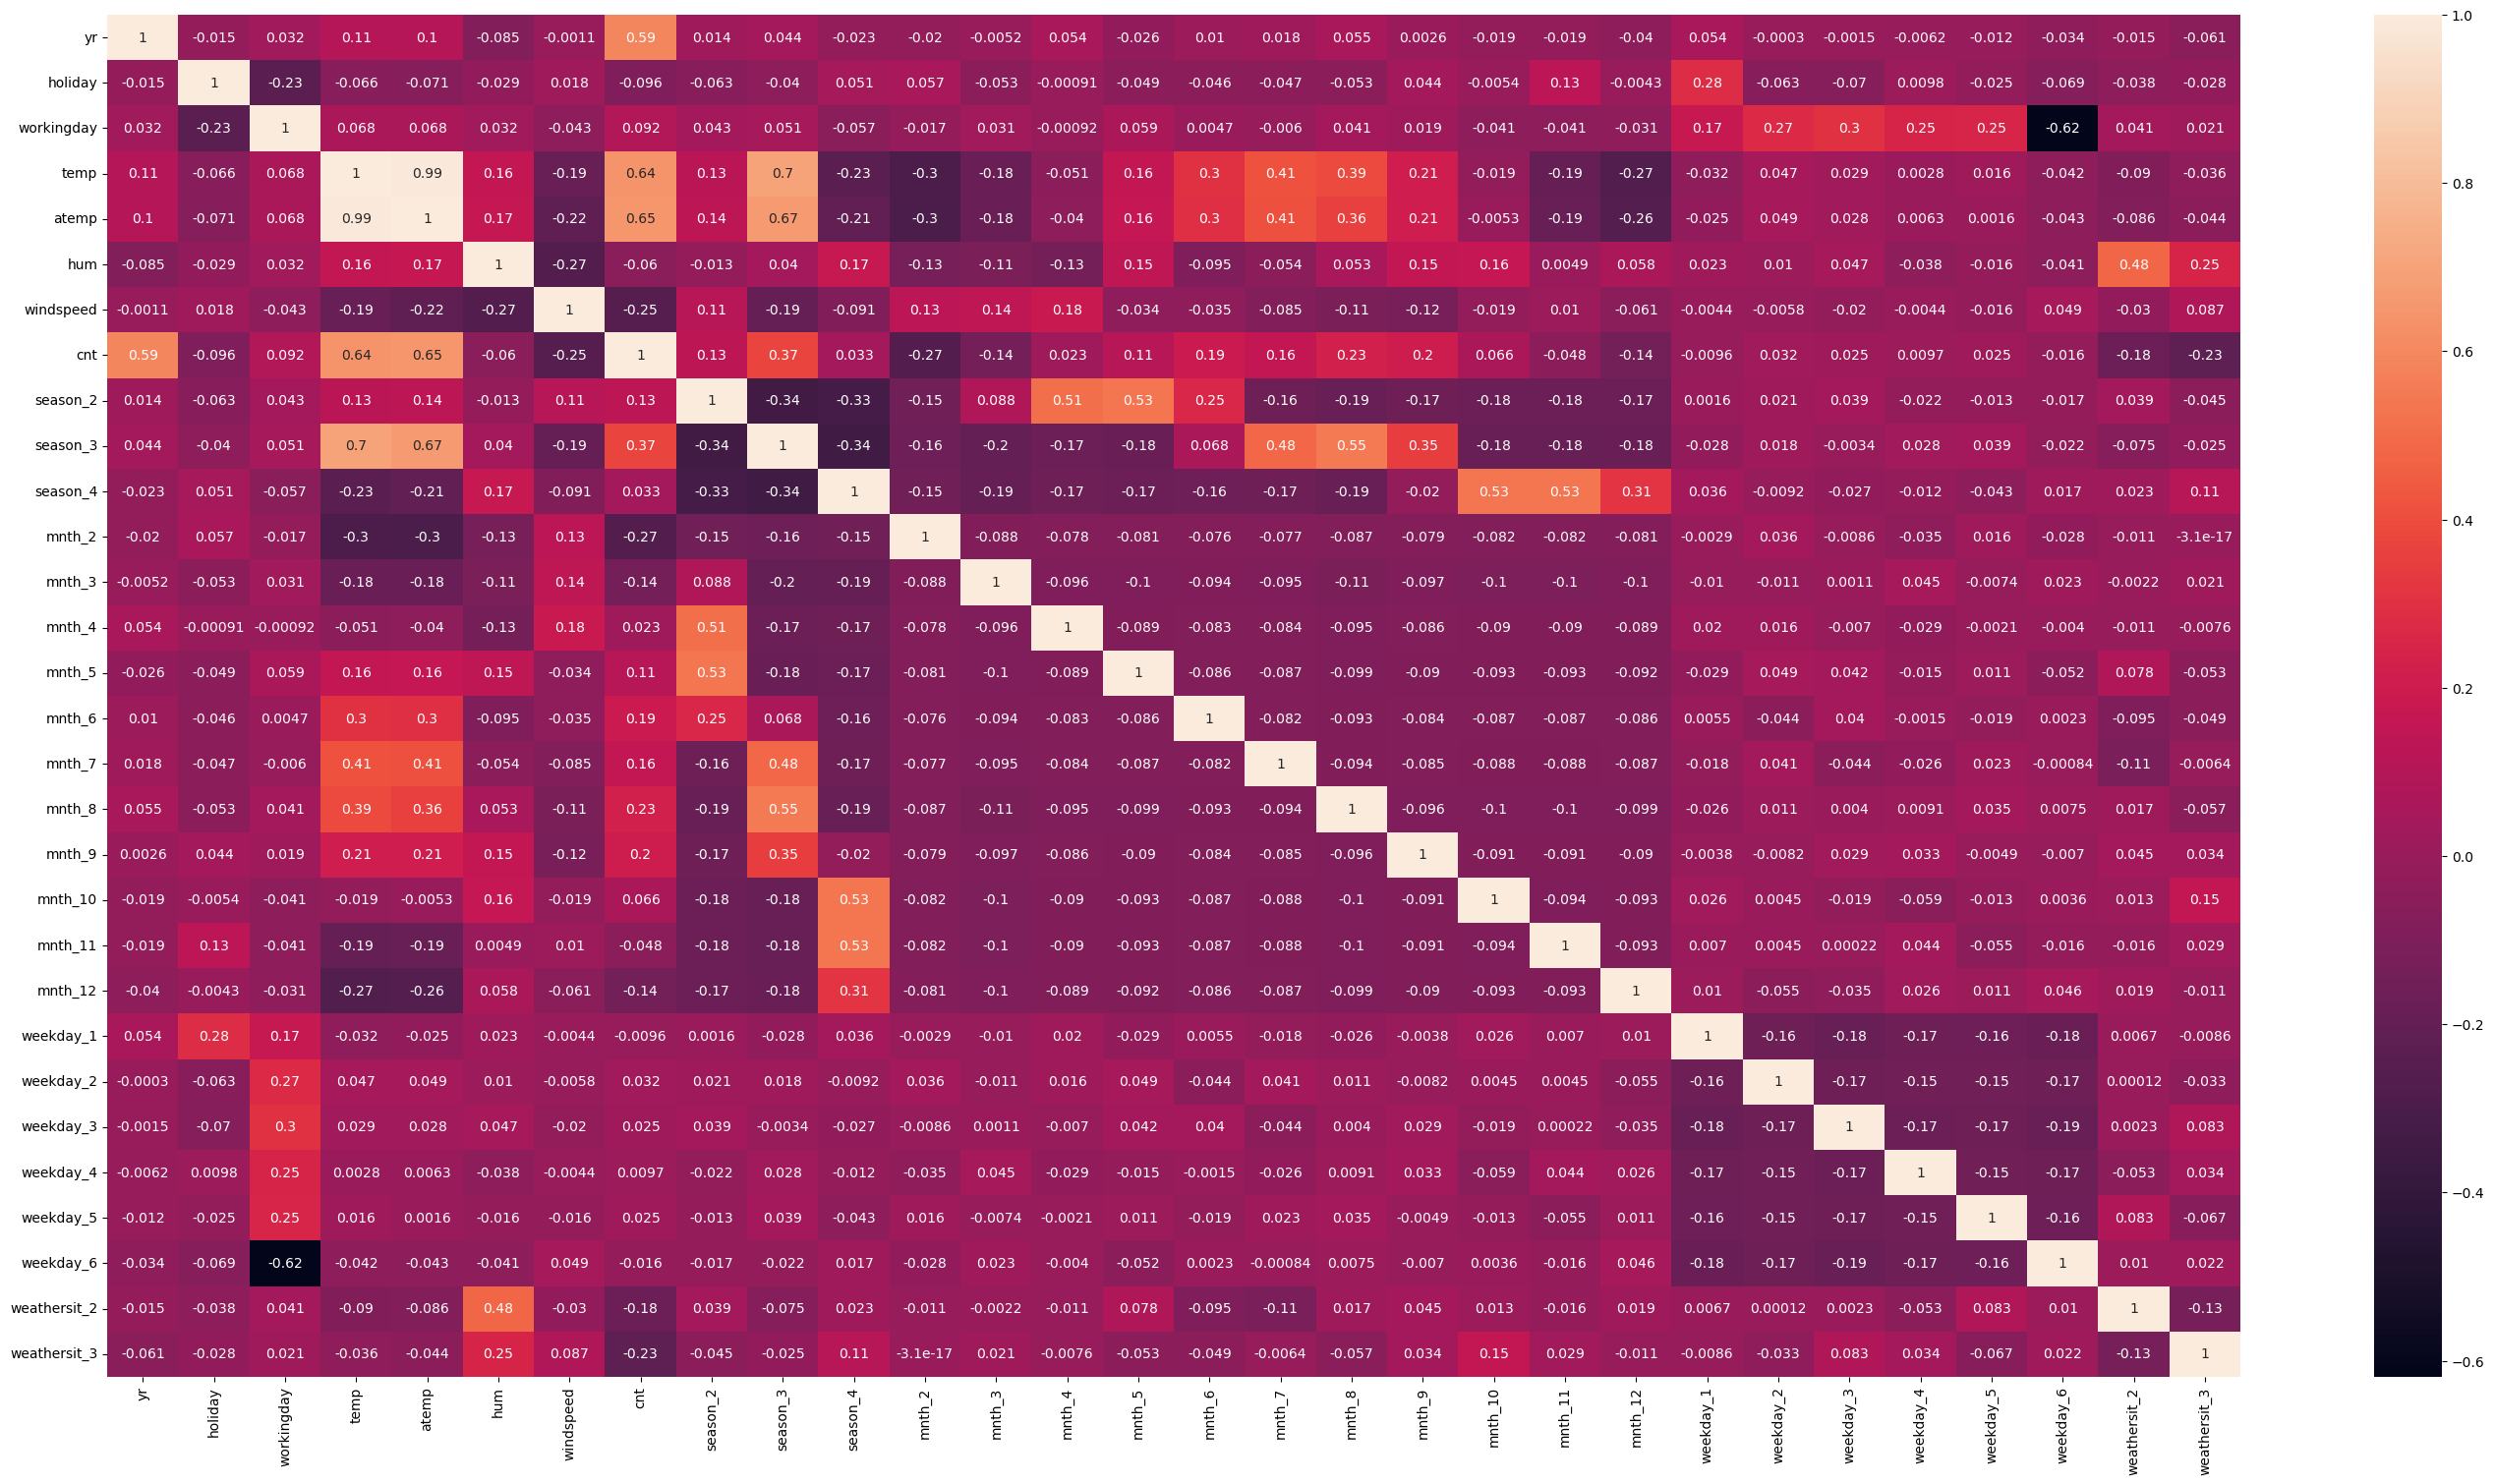

In [27]:
plt.figure(figsize = (35, 18))
sns.heatmap(df_train.corr(), annot = True)
plt.show()

### dividing x and y  for model building 

In [28]:
y_train = df_train.pop('cnt')
X_train = df_train

In [29]:
df_train.shape

(510, 29)

In [30]:
### training model using rfe and statsmodel 

In [31]:
lrm = LinearRegression()
lrm.fit(X_train, y_train)

LinearRegression()

In [32]:
rfe=RFE(lrm,n_features_to_select=15)
rfe=rfe.fit(X_train,y_train)

In [33]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 7),
 ('mnth_3', False, 2),
 ('mnth_4', False, 4),
 ('mnth_5', False, 3),
 ('mnth_6', False, 5),
 ('mnth_7', False, 8),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 9),
 ('mnth_12', False, 10),
 ('weekday_1', False, 11),
 ('weekday_2', False, 12),
 ('weekday_3', False, 14),
 ('weekday_4', False, 15),
 ('weekday_5', False, 13),
 ('weekday_6', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [34]:
col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'mnth_8', 'mnth_9', 'mnth_10', 'weekday_6',
       'weathersit_2', 'weathersit_3'],
      dtype='object')


In [35]:
X_train.columns[~rfe.support_]

Index(['atemp', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7',
       'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5'],
      dtype='object')

In [36]:
X_train_rfe = X_train[col]

In [37]:
X_train_rfe.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'mnth_8', 'mnth_9', 'mnth_10', 'weekday_6',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

### Model

In [38]:
X_train_rfe=sm.add_constant(X_train_rfe)
l_m_1=sm.OLS(y_train,X_train_rfe).fit()
print(l_m_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.7
Date:                Wed, 12 Apr 2023   Prob (F-statistic):          1.89e-191
Time:                        18:06:34   Log-Likelihood:                 520.09
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1950      0.029      6.791   

In [39]:
#### check vif values

In [40]:
vif=pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,53.48
8,season_3,6.04
4,temp,3.71
7,season_2,2.60
9,season_4,2.17
5,hum,1.91
3,workingday,1.88
13,weekday_6,1.79
10,mnth_8,1.68
14,weathersit_2,1.58


In [41]:
# we will drop season_3 beacause it has high p value
X_train_new2 = X_train_rfe.drop(['season_3'], axis = 1)

In [42]:
X_train_lrm3=sm.add_constant(X_train_new2)
l_m_3=sm.OLS(y_train,X_train_lrm3).fit()
print(l_m_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     197.5
Date:                Wed, 12 Apr 2023   Prob (F-statistic):          3.24e-192
Time:                        18:06:34   Log-Likelihood:                 519.16
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     495   BIC:                            -944.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1945      0.029      6.770   

In [43]:
vif=pd.DataFrame()
vif['Features']=X_train_new2.columns
vif['VIF']=[variance_inflation_factor(X_train_new2.values, i) for i in range(X_train_new2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,53.47
3,workingday,1.88
5,hum,1.88
12,weekday_6,1.79
8,season_4,1.72
4,temp,1.59
13,weathersit_2,1.57
11,mnth_10,1.49
9,mnth_8,1.46
7,season_2,1.38


In [44]:
X_train_new3 = X_train_new2.drop(['mnth_10'], axis = 1)

In [45]:
X_train_lrm4=sm.add_constant(X_train_new3)
l_m_4=sm.OLS(y_train,X_train_lrm4).fit()
print(l_m_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     210.2
Date:                Wed, 12 Apr 2023   Prob (F-statistic):          3.81e-192
Time:                        18:06:35   Log-Likelihood:                 516.20
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     496   BIC:                            -945.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1877      0.029      6.532   

In [46]:
vif=pd.DataFrame()
vif['Features']=X_train_new3.columns
vif['VIF']=[variance_inflation_factor(X_train_new3.values, i) for i in range(X_train_new3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,52.94
3,workingday,1.88
5,hum,1.87
11,weekday_6,1.78
12,weathersit_2,1.57
4,temp,1.54
9,mnth_8,1.44
7,season_2,1.37
8,season_4,1.32
13,weathersit_3,1.24


In [47]:
#  "hum" variable has high vif value then lets drop the variabels
X_train_new4 = X_train_new3.drop(['hum'], axis = 1)

In [48]:
X_train_lrm5=sm.add_constant(X_train_new4)
l_m_5=sm.OLS(y_train,X_train_lrm5).fit()
print(l_m_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.9
Date:                Wed, 12 Apr 2023   Prob (F-statistic):          3.89e-189
Time:                        18:06:35   Log-Likelihood:                 506.25
No. Observations:                 510   AIC:                            -986.5
Df Residuals:                     497   BIC:                            -931.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0907      0.019      4.764   

In [49]:
vif=pd.DataFrame()
vif['Features']=X_train_new4.columns
vif['VIF']=[variance_inflation_factor(X_train_new4.values, i) for i in range(X_train_new4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,22.40
3,workingday,1.87
10,weekday_6,1.77
4,temp,1.47
8,mnth_8,1.44
6,season_2,1.37
7,season_4,1.27
9,mnth_9,1.20
2,holiday,1.16
5,windspeed,1.09


In [50]:
# Drop mnth_8 because of p value
X_train_new5 = X_train_new4.drop(['mnth_8'], axis = 1)

In [51]:
X_train_lrm6=sm.add_constant(X_train_new5)
l_m_7=sm.OLS(y_train,X_train_lrm6).fit()
print(l_m_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     232.8
Date:                Wed, 12 Apr 2023   Prob (F-statistic):          2.92e-188
Time:                        18:06:35   Log-Likelihood:                 501.34
No. Observations:                 510   AIC:                            -978.7
Df Residuals:                     498   BIC:                            -927.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0849      0.019      4.443   

In [52]:
vif=pd.DataFrame()
vif['Features']=X_train_new5.columns
vif['VIF']=[variance_inflation_factor(X_train_new5.values, i) for i in range(X_train_new5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,22.19
3,workingday,1.87
9,weekday_6,1.77
4,temp,1.20
7,season_4,1.20
6,season_2,1.19
2,holiday,1.16
8,mnth_9,1.11
5,windspeed,1.09
11,weathersit_3,1.05


## Final Model Insights :-

- There is no multicollinearity between variables based on vif values.  
- All variabels is significant because of p value. 
- F-statistic value is high so it indicates best model fit .
- R-squared and adjusteR squared value is also show above 80% accuracy. 
- lowest AIC value is also best fit for model. 

## Residual Analysis for train data set

In [53]:
X_train_lrm6

,const,yr,holiday,workingday,temp,windspeed,season_2,season_4,mnth_9,weekday_6,weathersit_2,weathersit_3
653,1.0,1,0,1,0.509887,0.300794,0,1,0,0,0,0
576,1.0,1,0,1,0.815169,0.264686,0,0,0,0,0,0
426,1.0,1,0,0,0.442393,0.255342,0,0,0,1,1,0
728,1.0,1,0,0,0.245101,0.663106,0,0,0,0,0,0
482,1.0,1,0,0,0.395666,0.188475,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,0,1,0.824514,0.355596,1,0,0,0,1,0
578,1.0,1,0,1,0.863973,0.187140,0,0,0,0,0,0
53,1.0,0,0,1,0.202618,0.111379,0,0,0,0,0,0
350,1.0,0,0,0,0.248216,0.431816,0,1,0,1,1,0


In [54]:
y_train_predicted = l_m_7.predict(X_train_lrm6)

Text(0, 0.5, 'y_train_predicted')

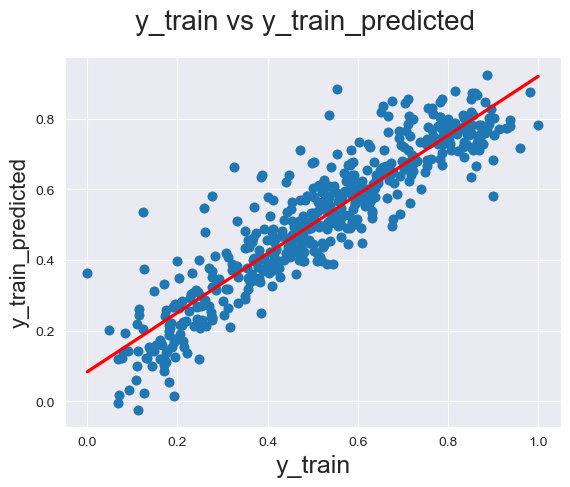

In [89]:
fig = plt.figure()
sns.regplot(x=y_train, y=y_train_predicted, ci=52, fit_reg=True, line_kws={"color": "red"})
plt.scatter(y_train, y_train_predicted)
fig.suptitle('y_train vs y_train_predicted', fontsize = 20) 
plt.xlabel('y_train', fontsize = 18)
plt.ylabel('y_train_predicted', fontsize = 16) 

### Normalitiy of errors

Text(0, 0.5, 'Density')

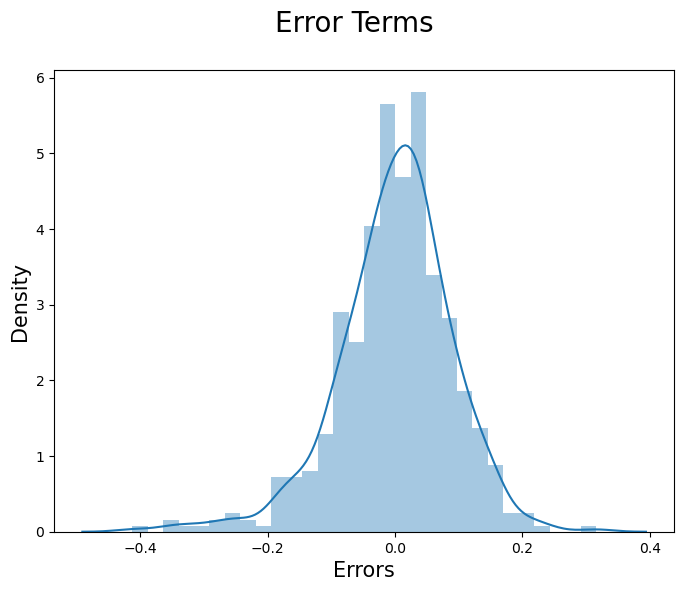

In [56]:
N_fig=plt.figure(figsize=(8,6))
sns.distplot((y_train-y_train_predicted),bins=30)
N_fig.suptitle('Error Terms',fontsize=20)
plt.xlabel('Errors',fontsize=15)
plt.ylabel('Density',fontsize=15)

#### Data is normally distributed in distplot & distribuation mean value is 0.

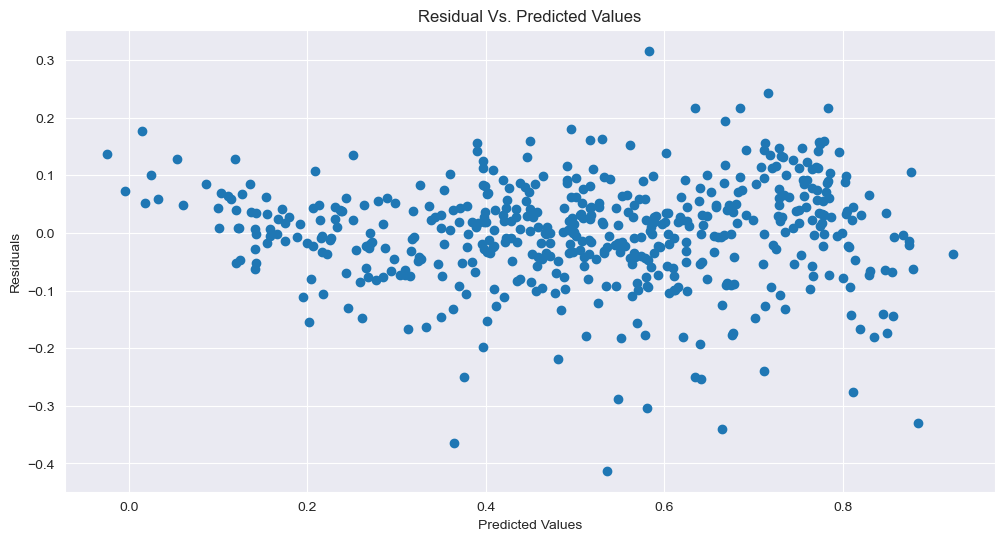

In [88]:
# Calclualting residuals:
res = y_train - y_train_predicted

plt.figure(figsize = (12,6))
sns.set_style("darkgrid")
plt.scatter(y_train_predicted,res)
plt.title('Residual Vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Prediction using final model (test data set )

In [57]:
num_v=['temp','atemp','hum','windspeed','cnt']
df_test[num_v]=scaler.fit_transform(df_test[num_v])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
184,0,1,0,0.837241,0.778767,0.534223,0.149393,0.704300,0,1,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.911423,0.855132,0.470417,0.231142,0.725421,1,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.496221,0.492359,0.777843,0.443398,0.278853,0,0,...,0,0,0,0,0,1,0,0,1,0
221,0,0,1,0.890387,0.805661,0.236659,0.449707,0.545512,0,1,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.821739,0.749249,0.070765,0.682387,0.569148,1,0,...,0,0,0,0,0,1,0,0,0,0


In [58]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.546312,0.530942,0.508750,0.418870,0.516216,0.264840,0.246575,...,0.073059,0.086758,0.127854,0.164384,0.100457,0.164384,0.178082,0.118721,0.319635,0.027397
std,0.500722,0.188034,0.459904,0.249189,0.228159,0.201253,0.188111,0.238702,0.442259,0.432005,...,0.260830,0.282125,0.334692,0.371472,0.301297,0.371472,0.383458,0.324202,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.328479,0.333829,0.358469,0.283817,0.359882,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.546045,0.547913,0.494200,0.402533,0.520241,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759735,0.720622,0.651165,0.524362,0.682487,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
df_test.shape

(219, 30)

In [61]:
# Dividing model into X_test and y_test
y_test=df_test.pop('cnt')
X_test=df_test

In [75]:
## selecting final model variabels in test data set 

X_test=sm.add_constant(X_test)
col1 = X_train_new5.columns
X_test=X_test[col1]
X_test_lrm7=X_test
X_test_lrm7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int64  
 2   holiday       219 non-null    int64  
 3   workingday    219 non-null    int64  
 4   temp          219 non-null    float64
 5   windspeed     219 non-null    float64
 6   season_2      219 non-null    uint8  
 7   season_4      219 non-null    uint8  
 8   mnth_9        219 non-null    uint8  
 9   weekday_6     219 non-null    uint8  
 10  weathersit_2  219 non-null    uint8  
 11  weathersit_3  219 non-null    uint8  
dtypes: float64(3), int64(3), uint8(6)
memory usage: 13.3 KB


In [76]:
## Making prediction using final model 
y_test_predicted = l_m_7.predict(X_test_lrm7)

## Model Evaluation 

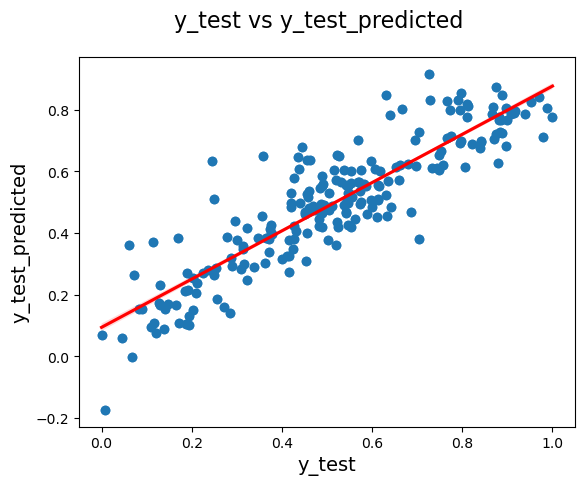

In [86]:
fig = plt.figure()
sns.regplot(x=y_test, y=y_test_predicted, ci=52, fit_reg=True, line_kws={"color": "red"})
plt.scatter(y_test, y_test_predicted)
fig.suptitle('y_test vs y_test_predicted', fontsize = 16)               
plt.xlabel('y_test', fontsize = 14)                          
plt.ylabel('y_test_predicted', fontsize = 14) 
plt.show()

In [82]:
# R-squared value test
r2=r2_score(y_test, y_test_predicted)
r2

0.7885162153395492

In [83]:
# Adjusted R2 matrics
n=X_test.shape[0]
p=X_test.shape[1]
AdjustedR2 = 1-(1-r2)*(n-1)/(n-p-1)
AdjustedR2

0.776196771572921

## Final model equation

cnt= 0.1264+(yr)*0.2328-(holiday)*0.0992+(temp)*0.5480-(windspeed)*0.1533+(season_2)*0.0868+(season_4)*0.1306+ (mnth_9)*0.1011-(weathersit_2)*0.0797-(weathersit_4)*0.2838

## Insights of analysis 

- temp, yr , sesaon_2,sesaon_4,mnth_9  based on their coefficient value unit increment increase bike demand 
- holiday,windspeed,weathersit_2,weathersit_3 based on their negative coefficient sign indicates increment  bike demand decrease 